In [31]:
import pandas as pd
import numpy as np

In [56]:
df=pd.read_csv("saleschannel.csv")
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [33]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [34]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [35]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [36]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [37]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

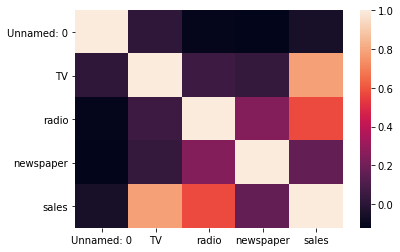

In [41]:
import seaborn as sns
sns.heatmap(df.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x2561120e7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x256112bf9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x256112b0ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x256112bfdd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x256112c33c8>],
 'means': []}

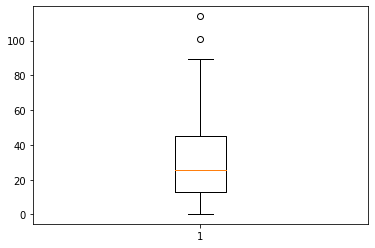

In [57]:
import matplotlib.pyplot as plt
plt.boxplot(df["newspaper"])

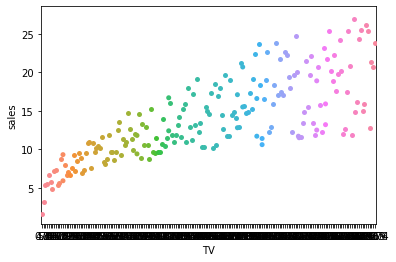

In [43]:
sns.swarmplot(x="TV",y="sales",data=df)

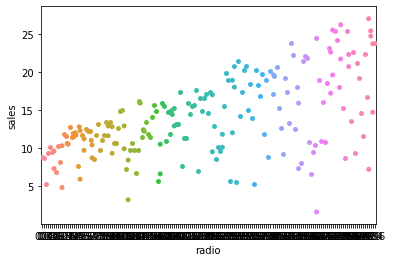

In [44]:
sns.swarmplot(x="radio",y="sales",data=df)

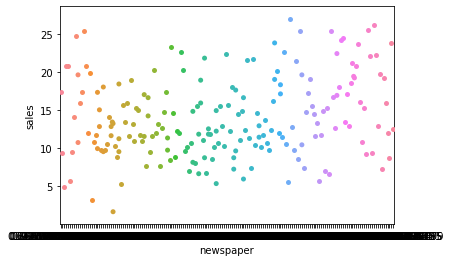

In [45]:
sns.swarmplot(x="newspaper",y="sales",data=df)

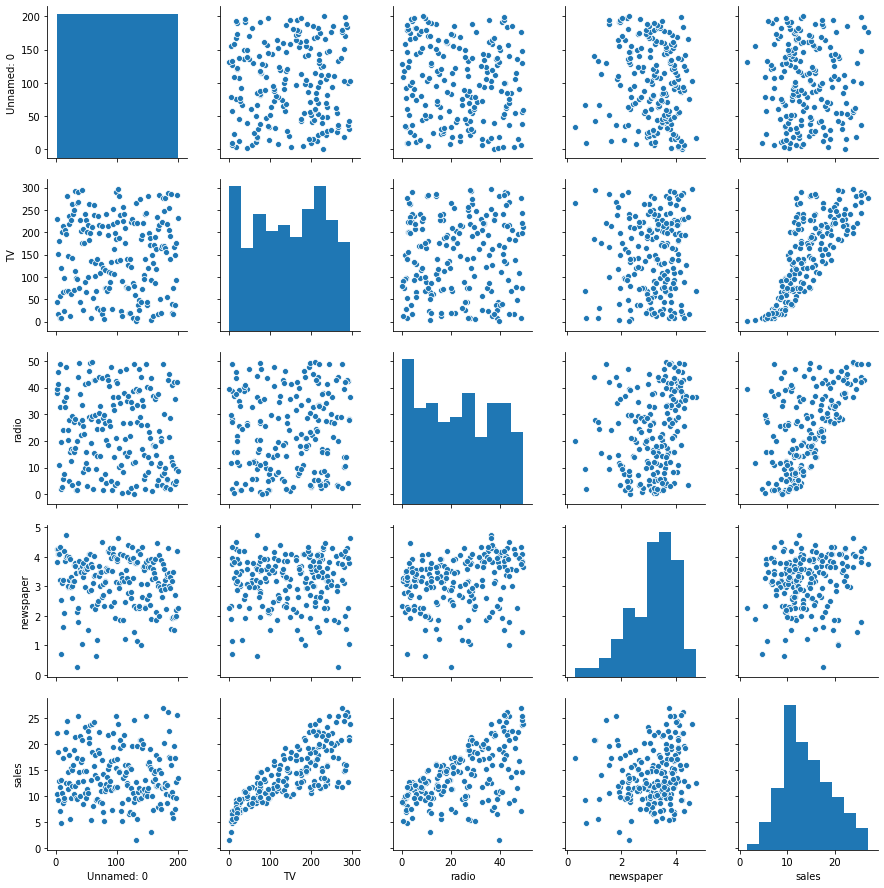

In [46]:
sns.pairplot(df)

In [58]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [59]:
#treating with the outliers
from scipy.stats import zscore
zscore=abs(zscore(df))
print(df.shape)
df1=df.loc[(zscore<3).all(axis=1)]
print(df1.shape)

(200, 5)
(199, 5)


In [60]:
x=df1.iloc[:,0:4]

In [61]:
Y=df1.iloc[:,-1]

In [62]:
y=Y.values.reshape(-1,1)

In [63]:
y.shape

(199, 1)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(30,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is",max_r_score)

r2_score corresponding to random state: 30 is 0.7273750557570087
r2_score corresponding to random state: 31 is 0.9580327094244626
r2_score corresponding to random state: 32 is 0.86344776986203
r2_score corresponding to random state: 33 is 0.9389821365313065
r2_score corresponding to random state: 34 is 0.8281536499518599
r2_score corresponding to random state: 35 is 0.8947877136398209
r2_score corresponding to random state: 36 is 0.9289804750426568
r2_score corresponding to random state: 37 is 0.875550988053948
r2_score corresponding to random state: 38 is 0.9369405015701038
r2_score corresponding to random state: 39 is 0.7589326603345709
r2_score corresponding to random state: 40 is 0.8183440625504727
r2_score corresponding to random state: 41 is 0.906368524332606
r2_score corresponding to random state: 42 is 0.9083483387356709
r2_score corresponding to random state: 43 is 0.87762336874497
r2_score corresponding to random state: 44 is 0.9109524978816789
r2_score corresponding to rando

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2").mean()

0.8846483764755293

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2_score is :",r2_score(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))


r2_score is : 0.8526607210411393
RMSE is : 1.7320818872768187


In [67]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=31,test_size=20)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [68]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.externals import joblib
joblib.dump(lr,'lr_saleschannelprediction.pj1')



['lr_saleschannelprediction.pj1']